# Case 3: Generate Pseudo-Data with your model

In [1]:
using Bombs

┌ Info: Precompiling BOMBS [9fa3cf97-96f5-4594-8ac7-dc80311f2c9e]
└ @ Base loading.jl:1260



                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  

Just to print the nice BOMBS logo

In [2]:
printLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


First we need to generate the model (the package will not do it automatically)

In [3]:
# Generate the empty dictionary with the model_def structure
model_def = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def["NameF"] = ["PLacExample"];
model_def["nStat"] = [4];
model_def["nPar"] = [9];
model_def["nInp"] = [1];
model_def["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def["inpName"] = ["IPTG"];

model_def["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def["Y0Sim"] = [];
model_def["tols"] = [1e-9, 1e-9];

# Generate the scripts with the ODEs and the step-wise implementation
model_def = GenerateModel(model_def);


----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------



### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [4]:
infoAll("pseudodata")



            CALL defPseudoDatStruct()

        MAIN STRUCTURE

pseudo_def["Nexp"] = [];
        # Integer indicating the number of experiments to be simulated

pseudo_def["finalTime"] = [];
        # Vector of final times for each simulation (initial time will always be assumed as 0,
        # so please consider that).

pseudo_def["switchT"] = [];
        # Array with the switching times of the inducer in the simulation (time 0 and final
        # time need to be considered)

pseudo_def["y0"] = [];
        # Array (single simulation) or matrix (multiple simulations) of Y0s for the simulations for each
        # experiment. If you are computing the steady-state this vector might not be used, however, you
        # still need to introduce it with some random numbers.

pseudo_def["preInd"] = [];
        # Vector of numbers with the values for the stimuli (inducer) in the over-night. It might be the case
        # that this entry is not required since only the y0 vector is considered for

# Pseudo-Data Generation Example 1
Here we code each element of the exeriment

In [5]:
pseudo_def = defPseudoDatStruct();

In [6]:
pseudo_def["Nexp"] = [2]; 
pseudo_def["finalTime"] = [1439, 1439]; 
pseudo_def["switchT"] = [[0, 500, 1000, 1439],[0, 1439]]; 
pseudo_def["y0"] = [[10,10,10,10],[10,10,10,10]]; 
pseudo_def["preInd"] = [[0],[0]]; 
pseudo_def["uInd"] = [[5, 100, 1],[7.5]]; 
pseudo_def["theta"] = [0.000377125304442752*60, 0.00738924359598526*60, 1.53333782244337, 5.01927275636639,
    0.00118831480244382*60, 0.0461264539194078*60, 0.000475563708997018*60, 0.000301803966012407*60, 68.8669567134881]; # Could be the directory and file name of a csv.
pseudo_def["tsamps"] = [collect(0:5:1439),collect(0:10:1439)];
pseudo_def["plot"] = [true];
pseudo_def["flag"] = ["Example1"];

pseudo_def["Obs"] = ["Cit_foldedP", "3*Cit_AU"]; 
pseudo_def["NoiseType"] = [];
pseudo_def["Noise"] = [0.1,0.2];

A print for the path where the results, CSVs and plots are saved will be shown. This will be in your working directory inside a new directory called Results. 

In [7]:
pseudo_res, model_def, pseudo_def = GenPseudoDat(model_def, pseudo_def);


----------------------------------------- RESULTS -----------------------------------------
Pseudo-Data results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-05-21
Under the name PLacExample_2021-05-21_PseudoDataResults_Example1.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
Pseudo-Data PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-05-21
Under the name PlotPseudoDat_Exp(i)_Example1.png
If more than one sample from the parameters are used, the plot will be the average between all traces.
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pseudo-

### Let's see the results structure

The results are a dictionary 4 different entries: Sims (simulations), SimsObs (Observables Simulations) <br>
PDat (Mean of the pseudo-data) and PError (Error of the pseudo-data)<br>
<br>
Contents of Sims are the same as for the simulation results from the ModelSim section

In [8]:
pseudo_res

Dict{Any,Any} with 4 entries:
  "SimsObs" => Dict{Any,Any}("PDExp_2"=>[18.8312 2469.03; 46.0153 2815.8; … ; 2…
  "Sims"    => Dict{Any,Any}("Exp_1"=>[0.317361 18.8312 11.9507 823.01; 1.24696…
  "PData"   => Dict{Any,Any}("PDExp_2"=>[20.6503 2260.26; 40.5087 3189.17; … ; …
  "PError"  => Dict{Any,Any}("PDExp_2"=>[1.88312 493.806; 4.60153 563.161; … ; …

For the other 3 entries, the structure of the same, however note that the keys of the dictionary now start with PD


In [9]:
pseudo_res["PData"]

Dict{Any,Any} with 2 entries:
  "PDExp_2" => [20.6503 2260.26; 40.5087 3189.17; … ; 259.614 29355.6; 267.477 …
  "PDExp_1" => [16.967 2447.5; 25.2497 2071.64; … ; 45.6049 6711.14; 50.0575 78…

And the contents for all of these are similar to the Model Simulation results. However, the second dimension of the resultant arrays is not the number of states, but the number of observables selected. 

In [10]:
pseudo_res["PData"]["PDExp_1"]

288×2×1 Array{Float64,3}:
[:, :, 1] =
  16.967    2447.5
  25.2497   2071.64
  37.4551   2639.43
  55.8992   3052.47
  71.8479   4785.64
  99.1305   4529.86
 108.128    3457.33
 131.946    7692.07
 122.262    8896.63
 134.212    9777.07
 166.989   11850.1
 162.578   13864.3
 182.128   12897.0
   ⋮       
  47.6688   4745.45
  57.2299   7568.09
  49.9765   5894.96
  41.0346   7413.17
  50.1251   6528.92
  45.3009   7357.65
  54.4782   5481.46
  45.1995   6406.11
  47.5555   6027.78
  42.2377   5388.57
  45.6049   6711.14
  50.0575   7839.93

This observables can be the model states by itself or operations done with those!


In [11]:
pseudo_res["SimsObs"]["PDExp_1"][:,2,:] == pseudo_res["Sims"]["Exp_1"][:,4,:].*3

true

In [12]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

Now we can plot the pseudo-data to see how did they go: 


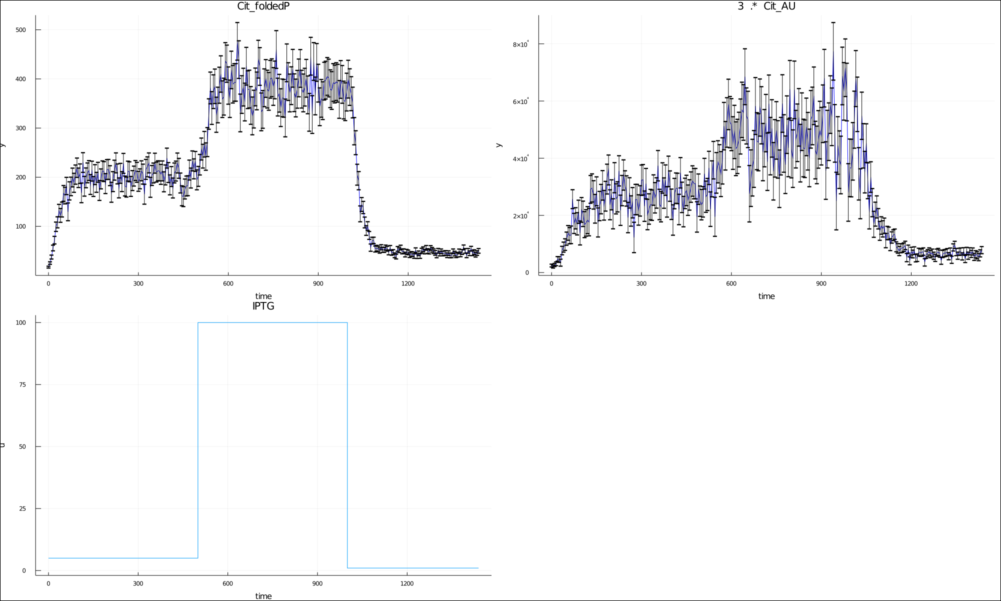

In [13]:
exp1 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",1,"_",pseudo_def["flag"],".png"))

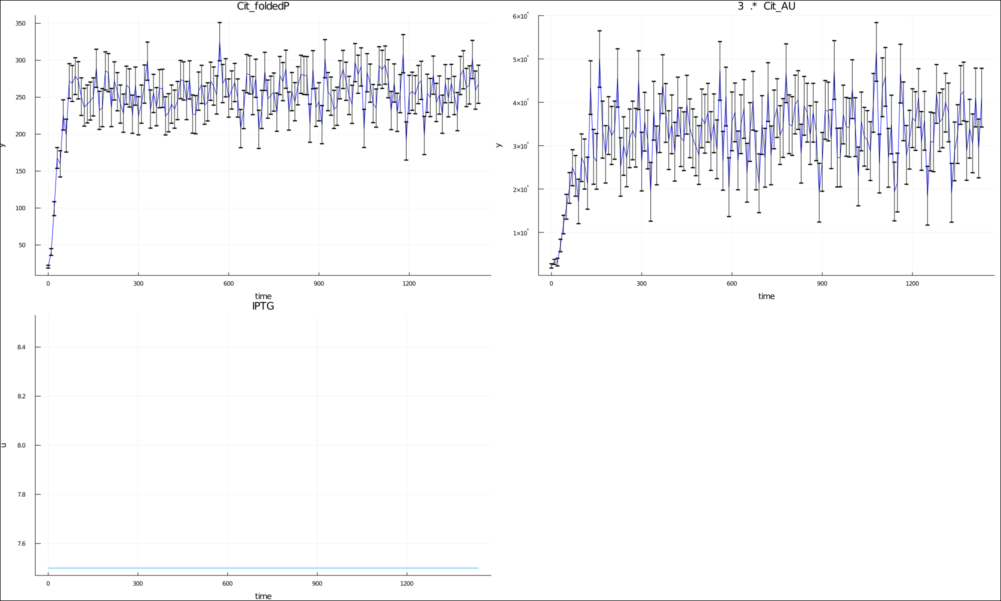

In [14]:
exp2 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",2,"_",pseudo_def["flag"],".png"))

If you would like to load the file with the results, just use the JLD pakage like this: 


In [15]:
using JLD
using Dates
JLD.load(string(pseudo_def["savepath"], "\\",model_def["NameF"], "_", today(),"_PseudoDataResults_",pseudo_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "PseudoData"            => Dict{Any,Any}("SimsObs"=>Dict{Any,Any}("PDExp_2"=>…
  "pseudo_def"            => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

### CSVs with the pseu-data are also generated under a folder called PseudoDataFiles. 
For each experiment we have 3 different files:
     - (ModelName)_EXP(i)_(tag)_Simulations: A file with the simulation results
     - (ModelName)_EXP(i)_(tag)_Observables: A file with the observables
     - (ModelName)_EXP(i)_(tag)_Events_Inputs: A file with the input structure

 Let's load them for the first expreiment so we can have a look: 

In [16]:
using CSV

In [17]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Simulations.csv"))

,time,Cit_mrna_Theta_1,Cit_foldedP_Theta_1,Cit_fluo_Theta_1,Cit_AU_Theta_1
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.317361,18.8312,11.9507,823.01
2,5.0,1.24696,25.1302,12.1432,836.265
3,10.0,1.89779,39.7039,13.2395,911.764
4,15.0,2.35346,57.9567,15.6036,1074.57
5,20.0,2.67248,77.111,19.2471,1325.49
6,25.0,2.89584,95.5703,24.0005,1652.84
7,30.0,3.05222,112.493,29.617,2039.63
8,35.0,3.1617,127.508,35.8337,2467.76
9,40.0,3.23835,140.528,42.4045,2920.27


In [18]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Observables.csv"))

,time1,Cit_foldedP_theta1_Mean,Cit_foldedP_theta1_Std,time2,3 .* Cit_AU_theta1_Mean
,Float64,Float64,Float64,Float64,Float64
1,0.0,23.7458,1.88312,0.0,2133.16
2,5.0,25.0879,2.51302,5.0,3190.92
3,10.0,34.6114,3.97039,10.0,2760.32
4,15.0,62.8687,5.79567,15.0,4661.6
5,20.0,92.4266,7.7111,20.0,4905.62
6,25.0,92.0862,9.55703,25.0,2063.36
7,30.0,107.057,11.2493,30.0,7427.21
8,35.0,136.797,12.7508,35.0,8681.08
9,40.0,169.784,14.0528,40.0,6720.78


In [19]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Events_Inputs.csv"))

,Switchingtimes,FinalTime,IPTG_Pre,IPTG
,Float64,Float64,Float64,Float64
1,0.0,1439.0,0.0,5.0
2,500.0,1439.0,0.0,100.0
3,1000.0,1439.0,0.0,1.0


# Pseudo-Data Generation Example 2
This example showins how to introduce the experiment information using CSV files. In this case it also takes multiple theta vectors (3).

In [20]:
pseudo_def = defPseudoDatStructFiles();

ALL THE FILES MUST BE CSV FILES!!!

---------------------------------------------------------------------------------------------------------

The observables file entry should have the following structure: 
Column 1: Sampling Times for the simulations
Column 2 + Number of states: Y0 value for each each state (in order) in each column. 
           Value might need to be repeated across all the column, but only the first row will be considered

---------------------------------------------------------------------------------------------------------

The event inputs file entry should have the following structure: 
Column 1: Each Switching time (final time not considered)
Column 2: Final time (can be repeated for as many entrances as column 1 has)
Column 3 + number of inducers: Repeated column for the value of the inducers in the ON. 
              If no pre-inducer will be used in the simulations, any number could be used
Column 4 + number of inducers: Value of each inducer at each swit

In [21]:
pseudo_def["ObservablesFile"] = ["DynStim_3_Observables.csv", "DynStim_4_Observables.csv"]; 
pseudo_def["EventInputsFile"] = ["DynStim_3_Events_Inputs.csv", "DynStim_4_Events_Inputs.csv"]; 
pseudo_def["theta"] = ["TestThetaPLac.csv"]; 
pseudo_def["MainDir"] = ["SimulationCSVs"];
pseudo_def["flag"] = "Example2";
pseudo_def["plot"] = "Yes";

pseudo_def["Obs"] = ["Cit_foldedP", "3*Cit_AU"]; 
pseudo_def["Noise"] = [0.1, 0.2];

In [22]:
pseudo_res, model_def, pseudo_def = GenPseudoDat(model_def, pseudo_def);


----------------------------------------- RESULTS -----------------------------------------
Pseudo Data results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PLacExample_2021-01-22_PseudoDataResults_Example2.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
Pseudo-Data PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name PlotPseudoDat_Exp(i)_Example2.png
If more than one samples from the parameters are used, the plot will be the average between all traces.
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pseudo

### Let's see the results structure

The results are a dictionary 4 different entries: Sims (simulations), SimsObs (Observables Simulations),
PDat (Mean of the pseudo-data) and PError (Error of the pseudo-data) <br>
<br>
Contents of Sims are the same as for the simulation results from the ModelSim section

In [23]:
pseudo_res

Dict{Any,Any} with 4 entries:
  "SimsObs" => Dict{Any,Any}("PDExp_2"=>[47.5083 6228.99; 47.5083 6228.99; … ; …
  "Sims"    => Dict{Any,Any}("Exp_1"=>[0.800655 47.5083 30.1499 2076.33; 2.4670…
  "PData"   => Dict{Any,Any}("PDExp_2"=>[50.2606 6699.91; 46.3574 7005.21; … ; …
  "PError"  => Dict{Any,Any}("PDExp_2"=>[4.75083 1245.8; 4.75083 1245.8; … ; 2.…

For the other 3 entries, the structure of the same, however note that the keys of the dictionary now start with PD


In [24]:
pseudo_res["PData"]

Dict{Any,Any} with 2 entries:
  "PDExp_2" => [50.2606 6699.91; 46.3574 7005.21; … ; 21.2273 2159.24; 15.7317 …
  "PDExp_1" => [47.2189 7186.2; 61.3075 7106.09; … ; 370.64 52277.5; 384.329 32…

And the contents for all of these are similar to the Model Simulation results. However, the second dimension of
the resultant arrays is not the number of states, but the number of observables selected. 

In [25]:
# Note that the 3rd dimension of the array is 3 (the number of theta vectors introduced)
pseudo_res["PData"]["PDExp_1"]

193×2×3 Array{Float64,3}:
[:, :, 1] =
  47.2189   7186.2
  61.3075   7106.09
  77.0763   6158.52
 132.871    9521.27
 146.961    8344.09
 168.195    7192.19
 212.217   14618.1
 247.457   14606.8
 275.089   17409.8
 255.376   17720.9
 279.992   20653.5
 324.439   16498.6
 349.413   28179.0
   ⋮       
 428.298   42975.6
 362.944   58727.9
 423.442   44537.9
 415.425   33702.9
 383.067   37625.1
 372.334   60545.2
 367.879   51535.1
 435.538   70745.2
 366.224   39540.3
 343.988   51814.0
 370.64    52277.5
 384.329   32665.5

[:, :, 2] =
  59.8557   5353.54
  65.1279   7415.22
  83.0124   8679.14
 118.887    9371.36
 149.318    7505.34
 167.135   10203.6
 225.865   10536.3
 207.246   11228.3
 289.192   16403.8
 266.199   19527.7
 307.064   19878.4
 280.227   25242.2
 290.661   31159.2
   ⋮       
 396.948   45142.2
 369.376   48972.5
 366.12    35430.4
 350.739   25292.3
 381.786   67050.5
 367.717   66844.5
 364.313   47920.5
 361.461   52405.4
 339.185   36729.2
 332.327   49386.5
 34

This observables can be the model states by itself or operations done with those!

In [26]:
pseudo_res["SimsObs"]["PDExp_1"][:,2,:] == pseudo_res["Sims"]["Exp_1"][:,4,:].*3

true

### Now we can plot the pseudo-data to see how did they go: 

Note that only 1 pseudo-data trace has been ploted. This is because the average between all the traces (3 in this case)
is given (to simplify plot generation). If you would like a plot for each theta, then you will have to do it 
yourself :( <br>
<br>
This is only done for the plots, in the CSVs you will see an entry for each theta


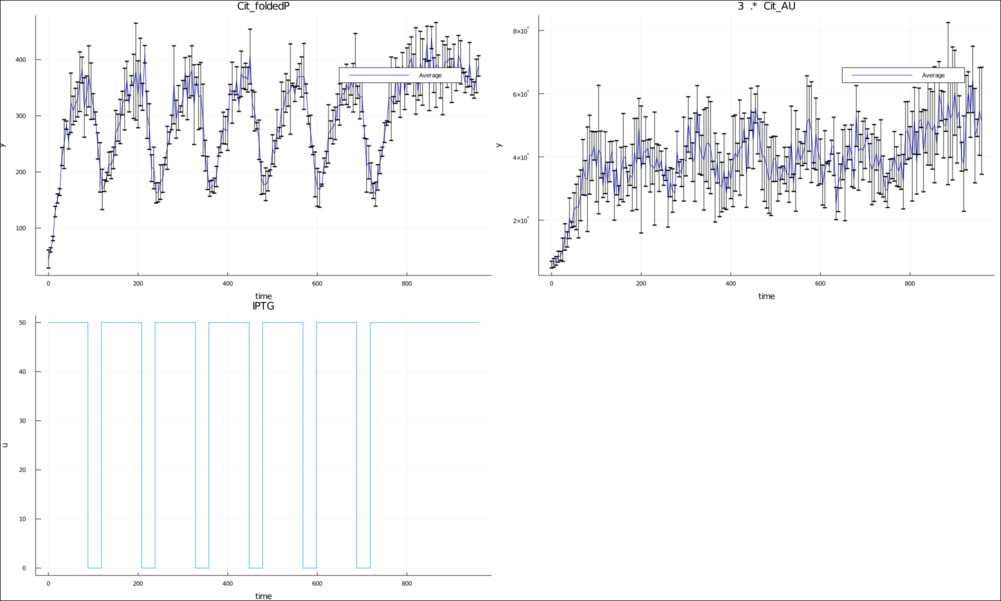

In [27]:
exp1 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",1,"_",pseudo_def["flag"],".png"))

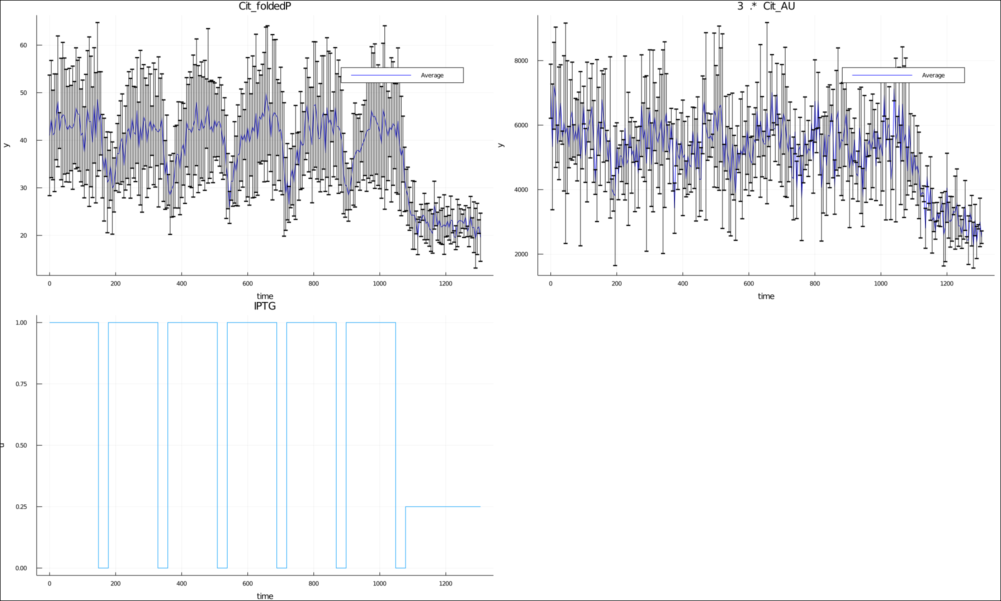

In [28]:
exp2 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",2,"_",pseudo_def["flag"],".png"))

If you would like to load the file with the results, just use the JLD pakage like this: 


In [29]:
JLD.load(string(pseudo_def["savepath"], "\\",model_def["NameF"], "_", today(),"_PseudoDataResults_",pseudo_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "PseudoData"            => Dict{Any,Any}("SimsObs"=>Dict{Any,Any}("PDExp_2"=>…
  "pseudo_def"            => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

### CSVs with the pseu-data are also generated under a folder called PseudoDataFiles. 
For each experiment we have 3 different files:
     - (ModelName)_EXP(i)_(tag)_Simulations: A file with the simulation results
     - (ModelName)_EXP(i)_(tag)_Observables: A file with the observables
     - (ModelName)_EXP(i)_(tag)_Events_Inputs: A file with the input structure

 Let's load them for the first expreiment so we can have a look: 

In [30]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Simulations.csv"))

,time,Cit_mrna_Theta_1,Cit_foldedP_Theta_1,Cit_fluo_Theta_1,Cit_AU_Theta_1
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.800655,47.5083,30.1499,2076.33
2,5.01667,2.46706,58.8,30.4949,2100.09
3,10.0167,3.63375,84.9249,32.4602,2235.43
4,15.0333,4.45058,117.645,36.698,2527.28
5,20.0333,5.02247,151.981,43.2294,2977.08
6,25.0333,5.42286,185.072,51.7504,3563.89
7,30.0333,5.70319,215.407,61.8187,4257.26
8,35.0333,5.89945,242.323,72.9628,5024.72
9,40.0333,6.03686,265.664,84.7417,5835.91


In [31]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Observables.csv"))

,time1,Cit_foldedP_theta1_Mean,Cit_foldedP_theta1_Std,time2,3 .* Cit_AU_theta1_Mean
,Float64,Float64,Float64,Float64,Float64
1,0.0,47.2189,4.75083,0.0,7186.2
2,5.01667,61.3075,5.88,5.01667,7106.09
3,10.0167,77.0763,8.49249,10.0167,6158.52
4,15.0333,132.871,11.7645,15.0333,9521.27
5,20.0333,146.961,15.1981,20.0333,8344.09
6,25.0333,168.195,18.5072,25.0333,7192.19
7,30.0333,212.217,21.5407,30.0333,14618.1
8,35.0333,247.457,24.2323,35.0333,14606.8
9,40.0333,275.089,26.5664,40.0333,17409.8


In [32]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Events_Inputs.csv"))

,Switchingtimes,FinalTime,IPTG_Pre,IPTG
,Float64,Float64,Float64,Float64
1,0.0,960.017,1.0,50.0
2,88.4283,960.017,1.0,0.0
3,118.428,960.017,1.0,50.0
4,208.433,960.017,1.0,0.0
5,238.433,960.017,1.0,50.0
6,328.433,960.017,1.0,0.0
7,358.433,960.017,1.0,50.0
8,448.433,960.017,1.0,0.0
9,478.433,960.017,1.0,50.0


# Pseudo-Data Generation Example 3
This is the same as example 1 but setting the experimental noise to be homoscedastic

In [15]:
pseudo_def = defPseudoDatStruct();

In [16]:
pseudo_def["Nexp"] = [2]; 
pseudo_def["finalTime"] = [1439, 1439]; 
pseudo_def["switchT"] = [[0, 500, 1000, 1439],[0, 1439]]; 
pseudo_def["y0"] = [[10,10,10,10],[10,10,10,10]]; 
pseudo_def["preInd"] = [[0],[0]]; 
pseudo_def["uInd"] = [[5, 100, 1],[7.5]]; 
pseudo_def["theta"] = [0.000377125304442752*60, 0.00738924359598526*60, 1.53333782244337, 5.01927275636639,
    0.00118831480244382*60, 0.0461264539194078*60, 0.000475563708997018*60, 0.000301803966012407*60, 68.8669567134881]; # Could be the directory and file name of a csv.
pseudo_def["tsamps"] = [collect(0:5:1439),collect(0:10:1439)];
pseudo_def["plot"] = [true];
pseudo_def["flag"] = ["Example3"];

pseudo_def["Obs"] = ["Cit_foldedP", "3*Cit_AU"]; 
pseudo_def["NoiseType"] = ["Homo"];
pseudo_def["Noise"] = [40,2000];

A print for the path where the results, CSVs and plots are saved will be shown. This will be in your working directory inside a new directory called Results. 

In [17]:
pseudo_res, model_def, pseudo_def = GenPseudoDat(model_def, pseudo_def);


----------------------------------------- RESULTS -----------------------------------------
Pseudo-Data results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-05-21
Under the name PLacExample_2021-05-21_PseudoDataResults_Example3.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
Pseudo-Data PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-05-21
Under the name PlotPseudoDat_Exp(i)_Example3.png
If more than one sample from the parameters are used, the plot will be the average between all traces.
--------------------------------------------------------------------------------------


----------------------------------------- CSVs -----------------------------------------
Pseudo-

### Let's see the results structure

The results are a dictionary 4 different entries: Sims (simulations), SimsObs (Observables Simulations) <br>
PDat (Mean of the pseudo-data) and PError (Error of the pseudo-data)<br>
<br>
Contents of Sims are the same as for the simulation results from the ModelSim section

In [18]:
pseudo_res

Dict{Any,Any} with 4 entries:
  "SimsObs" => Dict{Any,Any}("PDExp_2"=>[18.8312 2469.03; 46.0153 2815.8; … ; 2…
  "Sims"    => Dict{Any,Any}("Exp_1"=>[0.317361 18.8312 11.9507 823.01; 1.24696…
  "PData"   => Dict{Any,Any}("PDExp_2"=>[119.732 443.289; 30.3206 5257.52; … ; …
  "PError"  => Dict{Any,Any}("PDExp_2"=>[40.0 2000.0; 40.0 2000.0; … ; 40.0 200…

For the other 3 entries, the structure of the same, however note that the keys of the dictionary now start with PD


In [19]:
pseudo_res["PData"]

Dict{Any,Any} with 2 entries:
  "PDExp_2" => [119.732 443.289; 30.3206 5257.52; … ; 238.047 32862.2; 195.158 …
  "PDExp_1" => [12.1864 4905.94; 63.7556 3877.38; … ; 37.9334 7730.72; 46.2349 …

And the contents for all of these are similar to the Model Simulation results. However, the second dimension of the resultant arrays is not the number of states, but the number of observables selected. 

In [20]:
pseudo_res["PData"]["PDExp_1"]

288×2×1 Array{Float64,3}:
[:, :, 1] =
  12.1864    4905.94
  63.7556    3877.38
  -5.19041  -1069.75
  33.3863    3626.41
  94.1967    3892.46
  87.4723    5380.9
  94.779     3235.19
 120.392     3557.66
 210.066    11051.5
 172.825     7264.69
 149.678     8998.96
 186.482    12003.6
 136.993    14344.7
   ⋮        
  64.5675    7194.13
  87.7814    6972.63
  63.5333    8540.73
   7.63319   6163.43
  61.2014    5518.36
 143.93      2191.31
   5.34      7974.32
  36.689     6449.9
  57.8157    4663.52
   9.79936   6275.44
  37.9334    7730.72
  46.2349    7711.99

This observables can be the model states by itself or operations done with those!


In [21]:
pseudo_res["SimsObs"]["PDExp_1"][:,2,:] == pseudo_res["Sims"]["Exp_1"][:,4,:].*3

true

In [12]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

Now we can plot the pseudo-data to see how did they go: 


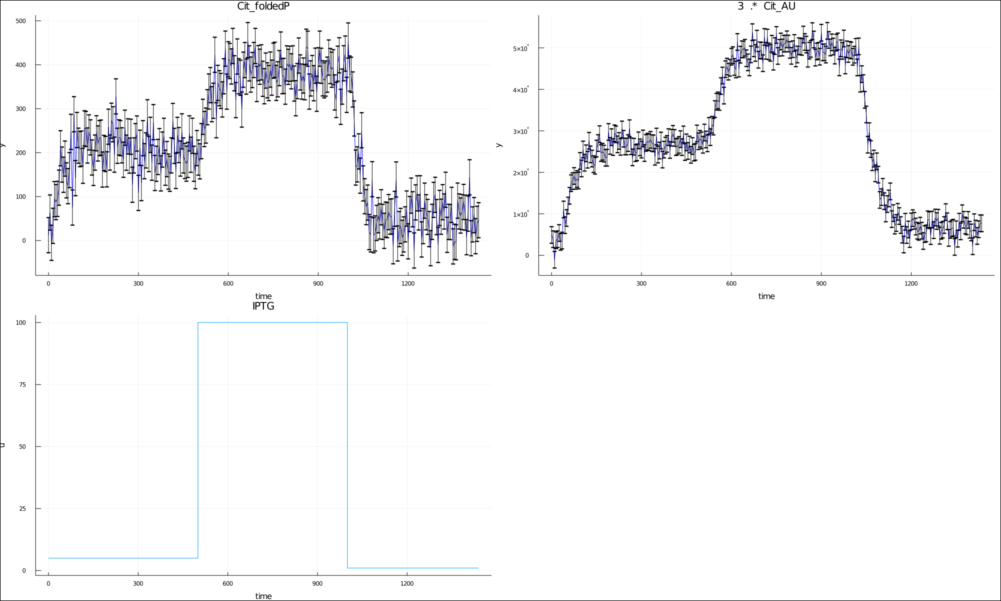

In [22]:
exp1 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",1,"_",pseudo_def["flag"],".png"))

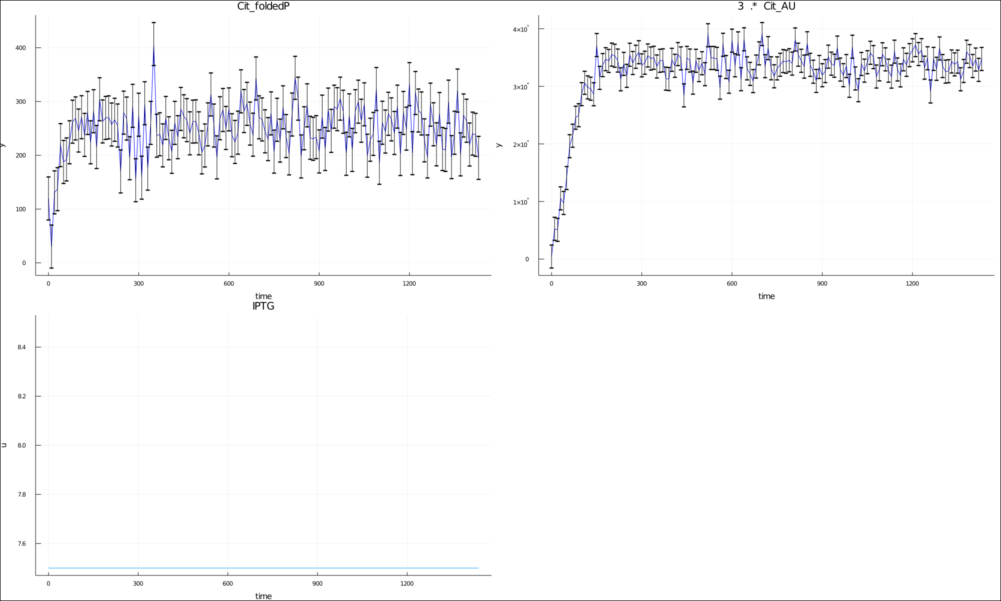

In [23]:
exp2 = load(string(pseudo_def["savepath"], "\\PlotPseudoDat_Exp",2,"_",pseudo_def["flag"],".png"))

If you would like to load the file with the results, just use the JLD pakage like this: 


In [24]:
using JLD
using Dates
JLD.load(string(pseudo_def["savepath"], "\\",model_def["NameF"], "_", today(),"_PseudoDataResults_",pseudo_def["flag"],".jld"))

Dict{String,Any} with 8 entries:
  "_creator\\JULIA_PATCH" => 0x00000000
  "PseudoData"            => Dict{Any,Any}("SimsObs"=>Dict{Any,Any}("PDExp_2"=>…
  "pseudo_def"            => Dict{Any,Any}("savepath"=>"E:\\UNI\\D_Drive\\PhD\\…
  "_creator\\WORD_SIZE"   => 64
  "model_def"             => Dict{Any,Any}("stName"=>["Cit_mrna", "Cit_foldedP"…
  "_creator\\JULIA_MINOR" => 0x00000004
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "_creator\\JULIA_MAJOR" => 0x00000001

### CSVs with the pseu-data are also generated under a folder called PseudoDataFiles. 
For each experiment we have 3 different files:
     - (ModelName)_EXP(i)_(tag)_Simulations: A file with the simulation results
     - (ModelName)_EXP(i)_(tag)_Observables: A file with the observables
     - (ModelName)_EXP(i)_(tag)_Events_Inputs: A file with the input structure

 Let's load them for the first expreiment so we can have a look: 

In [25]:
using CSV

In [26]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Simulations.csv"))

,time,Cit_mrna_Theta_1,Cit_foldedP_Theta_1,Cit_fluo_Theta_1,Cit_AU_Theta_1
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.317361,18.8312,11.9507,823.01
2,5.0,1.24696,25.1302,12.1432,836.265
3,10.0,1.89779,39.7039,13.2395,911.764
4,15.0,2.35346,57.9567,15.6036,1074.57
5,20.0,2.67248,77.111,19.2471,1325.49
6,25.0,2.89584,95.5703,24.0005,1652.84
7,30.0,3.05222,112.493,29.617,2039.63
8,35.0,3.1617,127.508,35.8337,2467.76
9,40.0,3.23835,140.528,42.4045,2920.27


In [27]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Observables.csv"))

,time1,Cit_foldedP_theta1_Mean,Cit_foldedP_theta1_Std,time2,3 .* Cit_AU_theta1_Mean
,Float64,Float64,Float64,Float64,Float64
1,0.0,12.1864,40.0,0.0,4905.94
2,5.0,63.7556,40.0,5.0,3877.38
3,10.0,-5.19041,40.0,10.0,-1069.75
4,15.0,33.3863,40.0,15.0,3626.41
5,20.0,94.1967,40.0,20.0,3892.46
6,25.0,87.4723,40.0,25.0,5380.9
7,30.0,94.779,40.0,30.0,3235.19
8,35.0,120.392,40.0,35.0,3557.66
9,40.0,210.066,40.0,40.0,11051.5


In [28]:
CSV.read(string(pseudo_def["savepath"], "\\PseudoDataFiles\\", model_def["NameF"], "_Exp",1,"_",
        pseudo_def["flag"],"_Events_Inputs.csv"))

,Switchingtimes,FinalTime,IPTG_Pre,IPTG
,Float64,Float64,Float64,Float64
1,0.0,1439.0,0.0,5.0
2,500.0,1439.0,0.0,100.0
3,1000.0,1439.0,0.0,1.0


### This is the end of the section. Look at the cool logo to check the package version ;) 


In [33]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  